# Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis for the AIAP 21 Technical Assessment.

## Overview
This notebook will analyze the gas monitoring data to understand patterns, trends, and insights.

## Data Source
- Database: `data/gas_monitoring.db`
- Note: The database file should not be uploaded to the repository


## Important Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Loading and Initial Exploration

This section will load the data from the database and perform initial exploration.


In [2]:
# Connect to the database
db_path = 'data/gas_monitoring.db'
conn = sqlite3.connect(db_path)

# Get table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Available tables:", [table[0] for table in tables])


Available tables: ['gas_monitoring']


In [3]:
# Load data from database
db_path = 'data/gas_monitoring.db'
conn = sqlite3.connect(db_path)

# Get table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Available tables:", [table[0] for table in tables])

# Load data from each table
dataframes = {}
for table in tables:
    table_name = table[0]
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    dataframes[table_name] = df
    print(f"\n{table_name} shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")

# Display first few rows of each table
for name, df in dataframes.items():
    print(f"\n=== {name.upper()} - First 5 rows ===")
    display(df.head())


Available tables: ['gas_monitoring']

gas_monitoring shape: (10000, 14)
Columns: ['Time of Day', 'Temperature', 'Humidity', 'CO2_InfraredSensor', 'CO2_ElectroChemicalSensor', 'MetalOxideSensor_Unit1', 'MetalOxideSensor_Unit2', 'MetalOxideSensor_Unit3', 'MetalOxideSensor_Unit4', 'CO_GasSensor', 'Session ID', 'HVAC Operation Mode', 'Ambient Light Level', 'Activity Level']

=== GAS_MONITORING - First 5 rows ===


,Time of Day,Temperature,Humidity,CO2_InfraredSensor,CO2_ElectroChemicalSensor,MetalOxideSensor_Unit1,MetalOxideSensor_Unit2,MetalOxideSensor_Unit3,MetalOxideSensor_Unit4,CO_GasSensor,Session ID,HVAC Operation Mode,Ambient Light Level,Activity Level
0,morning,19.63,53.83,125.49,571.09,478.55,735.85,497.59,565.05,medium,7241,off,very_dim,Low Activity
1,morning,19.66,53.69,126.34,575.79,491.96,740.28,NaN,557.08,low,7241,ventilation_only,bright,Low Activity
2,night,20.95,54.12,119.34,556.53,437.50,718.34,NaN,612.62,medium,9385,off,None,Low Activity
3,morning,20.10,50.48,113.50,NaN,515.14,744.02,676.15,600.22,low,7241,eco_mode,very_bright,High Activity
4,morning,19.89,48.42,92.77,613.65,535.66,770.27,720.27,625.73,low,7241,Heating_active,moderate,Low Activity


In [4]:
# Data quality assessment
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

for name, df in dataframes.items():
    print(f"\n{name.upper()}")
    print("-" * 30)
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\nData Types:")
    print(df.dtypes)
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values")
    
    print("\nDuplicate Rows:")
    duplicates = df.duplicated().sum()
    print(f"Found {duplicates} duplicate rows")
    
    print("\nUnique Values per Column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"  {col}: {unique_count} unique values")


DATA QUALITY ASSESSMENT

GAS_MONITORING
------------------------------
Shape: (10000, 14)
Memory usage: 3.34 MB

Data Types:
Time of Day                   object
Temperature                  float64
Humidity                     float64
CO2_InfraredSensor           float64
CO2_ElectroChemicalSensor    float64
MetalOxideSensor_Unit1       float64
MetalOxideSensor_Unit2       float64
MetalOxideSensor_Unit3       float64
MetalOxideSensor_Unit4       float64
CO_GasSensor                  object
Session ID                     int64
HVAC Operation Mode           object
Ambient Light Level           object
Activity Level                object
dtype: object

Missing Values:
CO2_ElectroChemicalSensor     706
MetalOxideSensor_Unit3       2566
CO_GasSensor                 1369
Ambient Light Level          2532
dtype: int64

Duplicate Rows:
Found 120 duplicate rows

Unique Values per Column:
  Time of Day: 4 unique values
  Temperature: 1505 unique values
  Humidity: 2176 unique values
  CO2_Infrar

In [5]:
# Statistical analysis
print("STATISTICAL ANALYSIS")
print("=" * 50)

for name, df in dataframes.items():
    print(f"\n{name.upper()}")
    print("-" * 30)
    
    # Descriptive statistics for numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("Descriptive Statistics (Numerical Columns):")
        print(df[numeric_cols].describe())
    
    # Categorical analysis
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print("\nCategorical Columns Analysis:")
        for col in categorical_cols:
            print(f"\n{col}:")
            print(f"  Unique values: {df[col].nunique()}")
            print(f"  Most frequent: {df[col].value_counts().head(3).to_dict()}")
    
    print("\n" + "="*50)


STATISTICAL ANALYSIS

GAS_MONITORING
------------------------------
Descriptive Statistics (Numerical Columns):
        Temperature      Humidity  CO2_InfraredSensor  \
count  10000.000000  10000.000000        10000.000000   
mean      42.564132     51.125461          110.356504   
std       74.350143     20.565964           25.056797   
min       14.940000    -49.660000          -14.670000   
25%       19.000000     47.680000           99.077500   
50%       20.530000     51.300000          113.100000   
75%       23.130000     53.850000          124.022500   
max      298.930000    199.590000          236.010000   

       CO2_ElectroChemicalSensor  MetalOxideSensor_Unit1  \
count                9294.000000            10000.000000   
mean                  578.333884              470.363051   
std                    22.669681               51.353223   
min                   408.600000              286.830000   
25%                   559.225000              439.630000   
50%           

CREATING VISUALIZATIONS

Creating visualizations for GAS_MONITORING


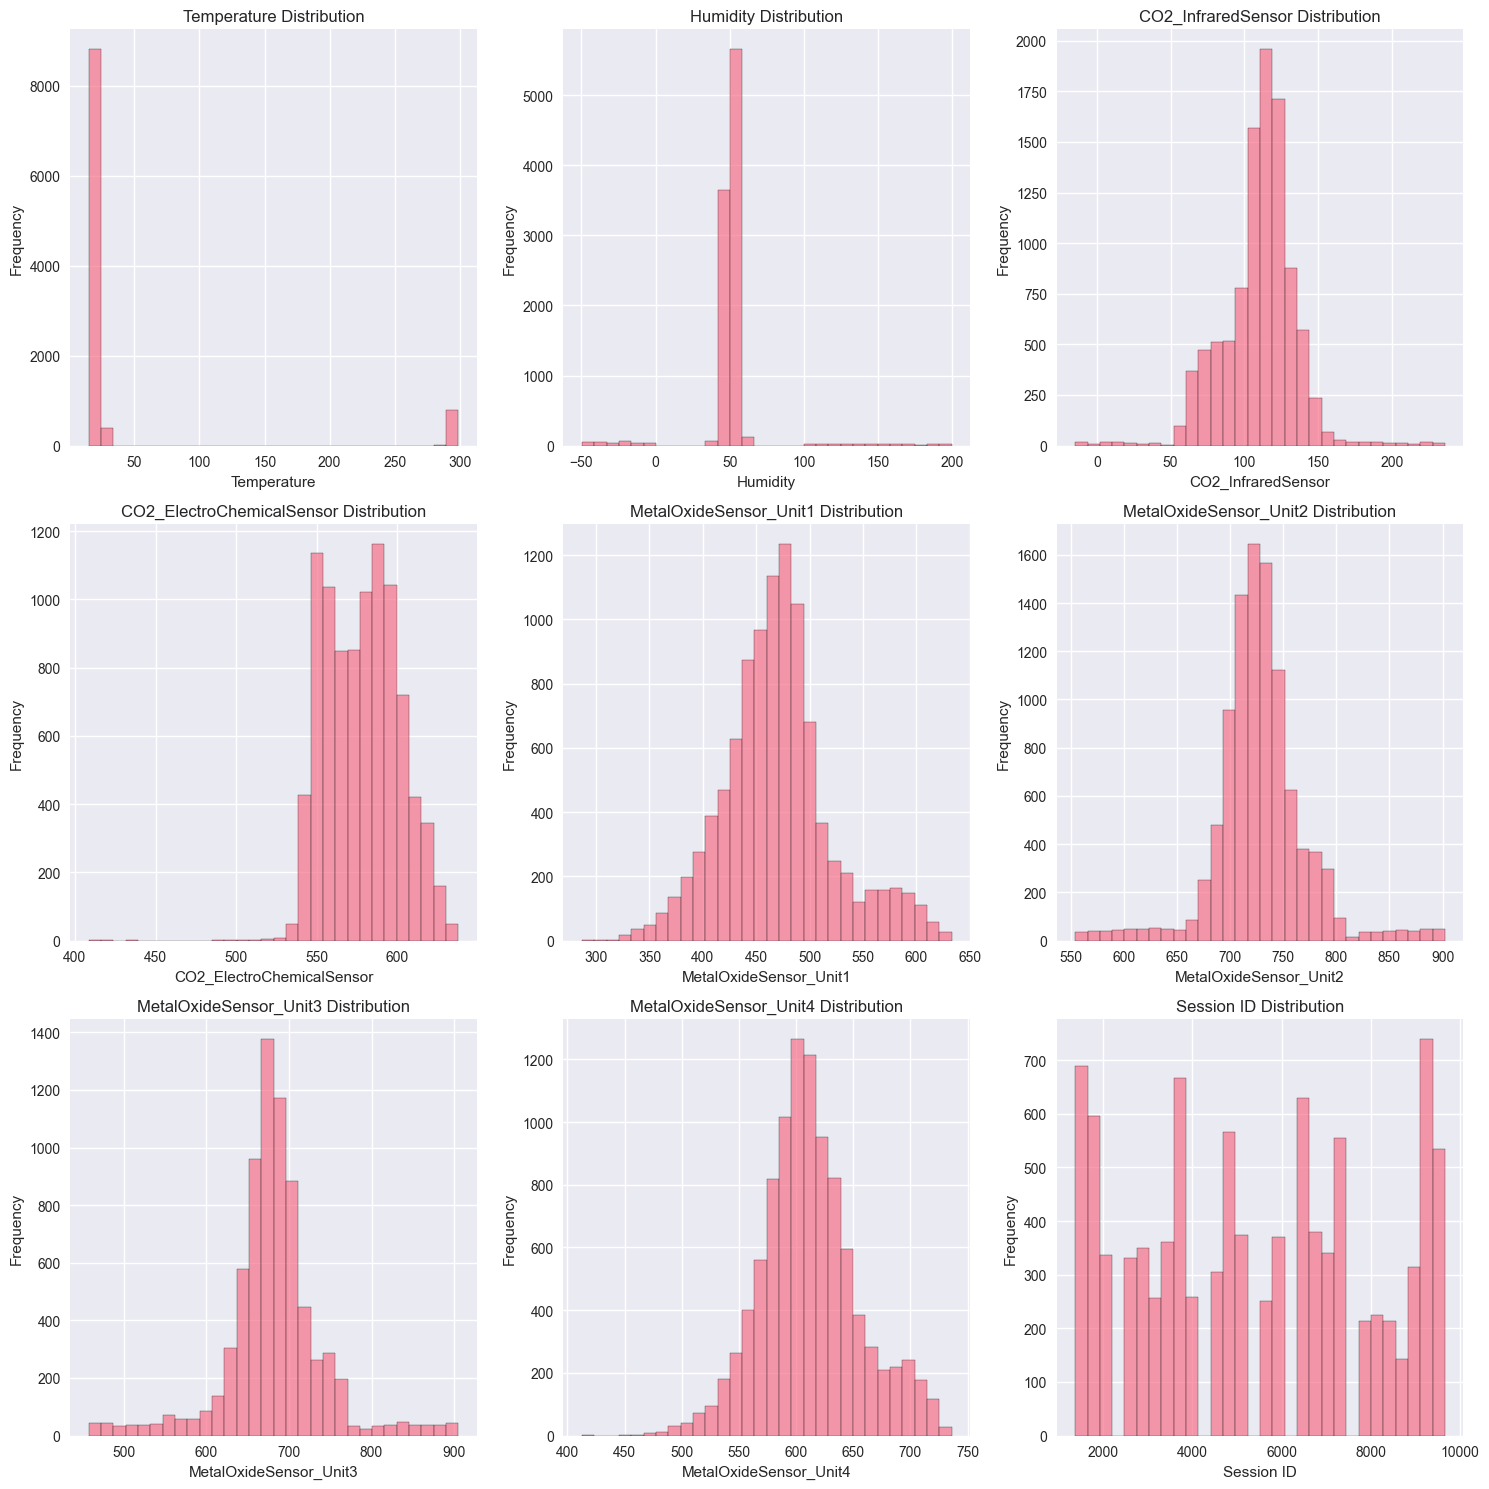

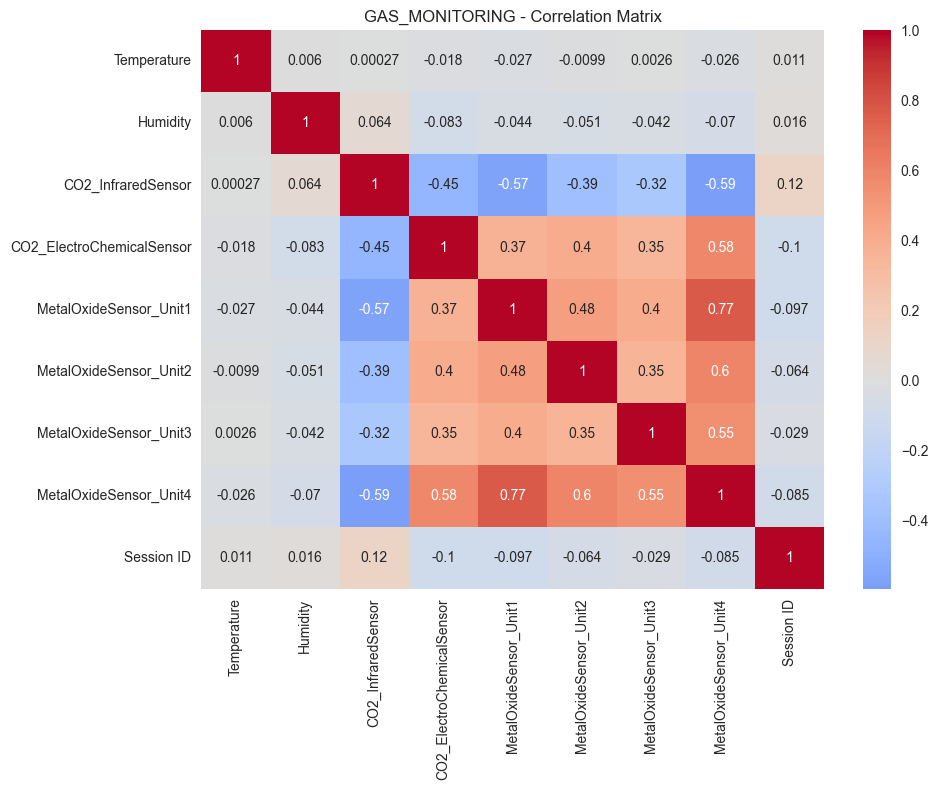

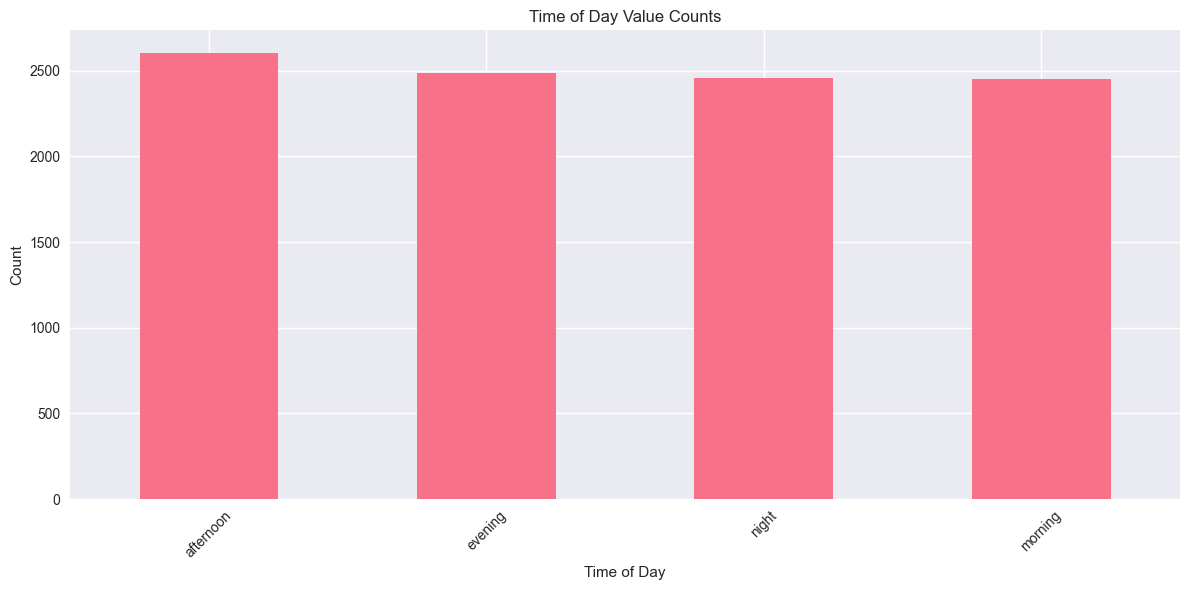

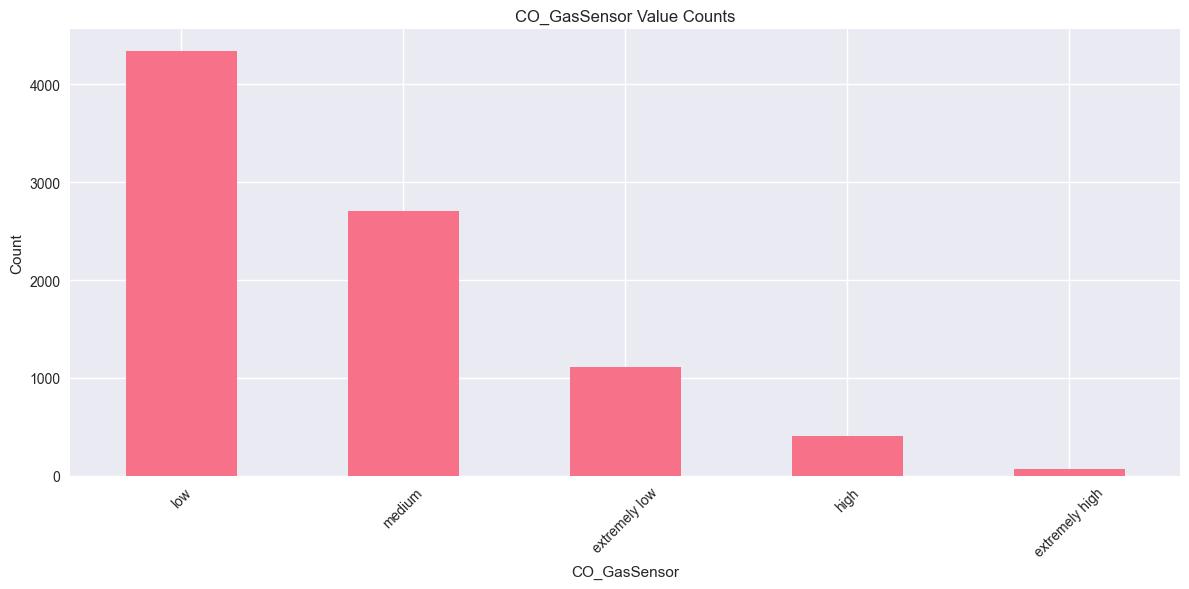

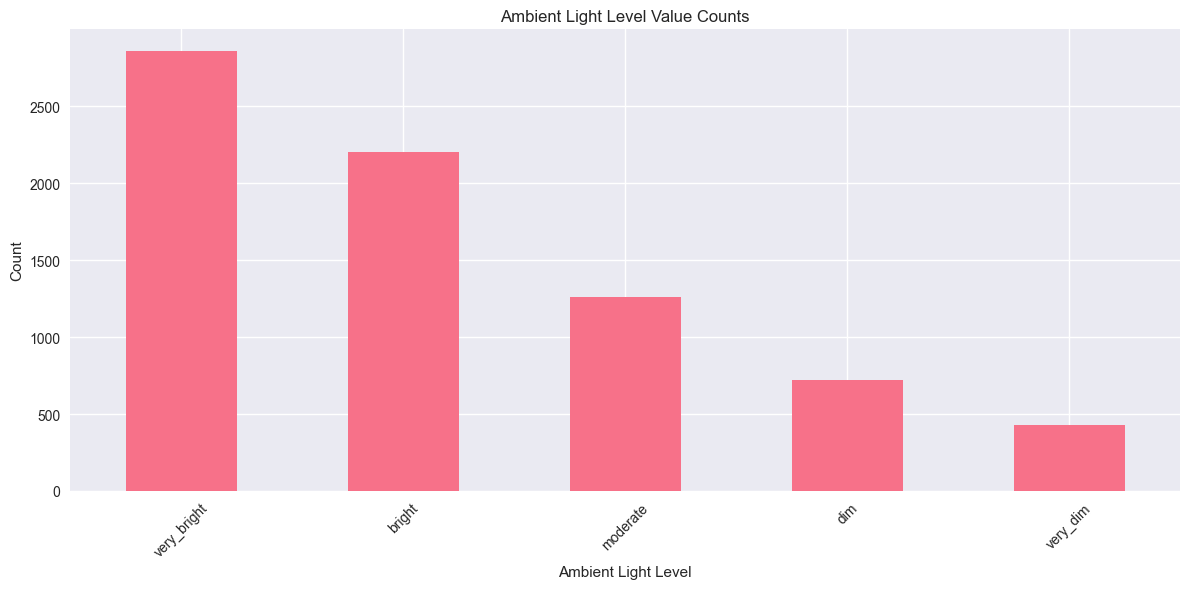

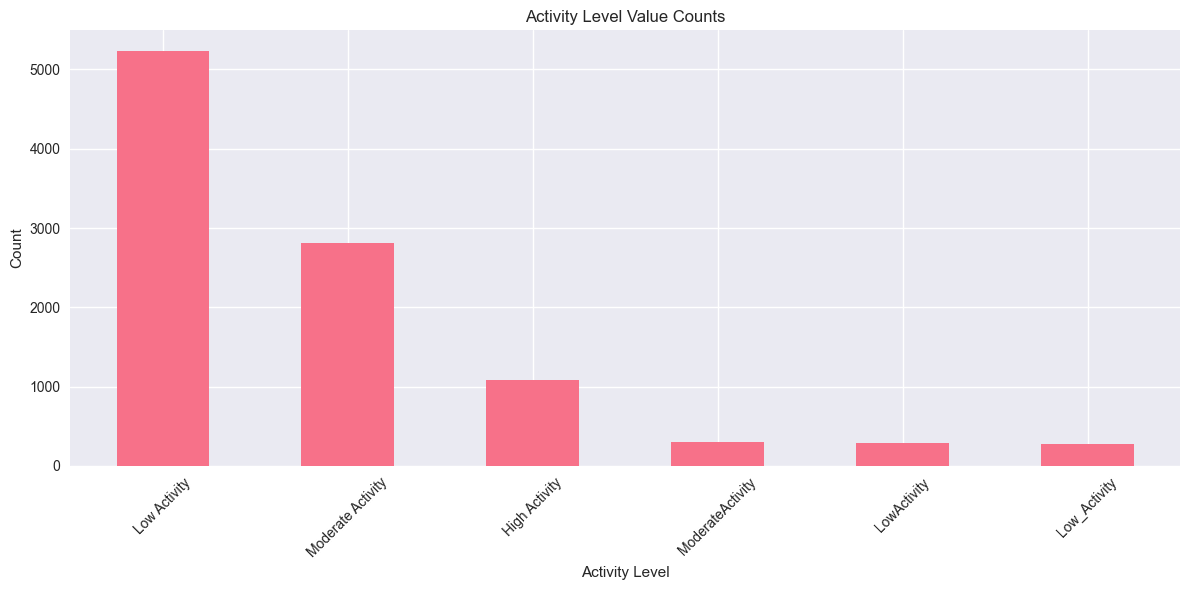


Visualizations completed!


In [6]:
# Visualization
print("CREATING VISUALIZATIONS")
print("=" * 50)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create visualizations for each table
for name, df in dataframes.items():
    print(f"\nCreating visualizations for {name.upper()}")
    
    # Get numerical columns for plotting
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # Create subplots for numerical columns
        n_cols = min(3, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                # Histogram
                axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'{col} Distribution')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Hide unused subplots
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Correlation heatmap if multiple numerical columns
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10, 8))
            correlation_matrix = df[numeric_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
            plt.title(f'{name.upper()} - Correlation Matrix')
            plt.tight_layout()
            plt.show()
    
    # Categorical analysis
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            if df[col].nunique() <= 20:  # Only plot if reasonable number of categories
                plt.figure(figsize=(12, 6))
                value_counts = df[col].value_counts()
                value_counts.plot(kind='bar')
                plt.title(f'{col} Value Counts')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

print("\nVisualizations completed!")


## Key Insights and Findings

This section will summarize the key insights from the EDA.


## Outlier Analysis and Box Plots

This section performs comprehensive outlier detection and visualization using box plots.


In [7]:
# Outlier Analysis and Box Plots
print("OUTLIER ANALYSIS AND BOX PLOTS")
print("=" * 50)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

# Analyze outliers for each numerical column
outlier_summary = {}

for name, df in dataframes.items():
    print(f"\n{name.upper()} - OUTLIER ANALYSIS")
    print("-" * 40)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_summary[name] = {}
    
    for col in numeric_cols:
        if df[col].notna().sum() > 0:  # Only analyze columns with data
            # IQR method
            outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
            outlier_count_iqr = len(outliers_iqr)
            outlier_percentage_iqr = (outlier_count_iqr / len(df)) * 100
            
            # Z-score method
            outliers_zscore = detect_outliers_zscore(df, col)
            outlier_count_zscore = len(outliers_zscore)
            outlier_percentage_zscore = (outlier_count_zscore / len(df)) * 100
            
            outlier_summary[name][col] = {
                'iqr_count': outlier_count_iqr,
                'iqr_percentage': outlier_percentage_iqr,
                'zscore_count': outlier_count_zscore,
                'zscore_percentage': outlier_percentage_zscore,
                'iqr_bounds': (lower, upper)
            }
            
            print(f"\n{col}:")
            print(f"  IQR Method: {outlier_count_iqr} outliers ({outlier_percentage_iqr:.2f}%)")
            print(f"  Z-Score Method: {outlier_count_zscore} outliers ({outlier_percentage_zscore:.2f}%)")
            print(f"  IQR Bounds: [{lower:.2f}, {upper:.2f}]")
            
            # Show extreme outliers
            if outlier_count_iqr > 0:
                extreme_outliers = outliers_iqr.nlargest(3, col)[col].values
                print(f"  Top 3 extreme values: {extreme_outliers}")

print("\n" + "="*50)


OUTLIER ANALYSIS AND BOX PLOTS

GAS_MONITORING - OUTLIER ANALYSIS
----------------------------------------

Temperature:
  IQR Method: 805 outliers (8.05%)
  Z-Score Method: 805 outliers (8.05%)
  IQR Bounds: [12.81, 29.32]
  Top 3 extreme values: [298.93 298.85 298.68]

Humidity:
  IQR Method: 503 outliers (5.03%)
  Z-Score Method: 423 outliers (4.23%)
  IQR Bounds: [38.42, 63.11]
  Top 3 extreme values: [199.59 199.27 198.33]

CO2_InfraredSensor:
  IQR Method: 390 outliers (3.90%)
  Z-Score Method: 169 outliers (1.69%)
  IQR Bounds: [61.66, 161.44]
  Top 3 extreme values: [236.01 235.93 235.91]

CO2_ElectroChemicalSensor:
  IQR Method: 9 outliers (0.09%)
  Z-Score Method: 10 outliers (0.10%)
  IQR Bounds: [505.29, 649.11]
  Top 3 extreme values: [500.54 495.65 492.58]

MetalOxideSensor_Unit1:
  IQR Method: 623 outliers (6.23%)
  Z-Score Method: 25 outliers (0.25%)
  IQR Bounds: [358.16, 575.40]
  Top 3 extreme values: [632.89 631.95 631.95]

MetalOxideSensor_Unit2:
  IQR Method: 676 

BOX PLOTS FOR OUTLIER VISUALIZATION

Box plots for GAS_MONITORING


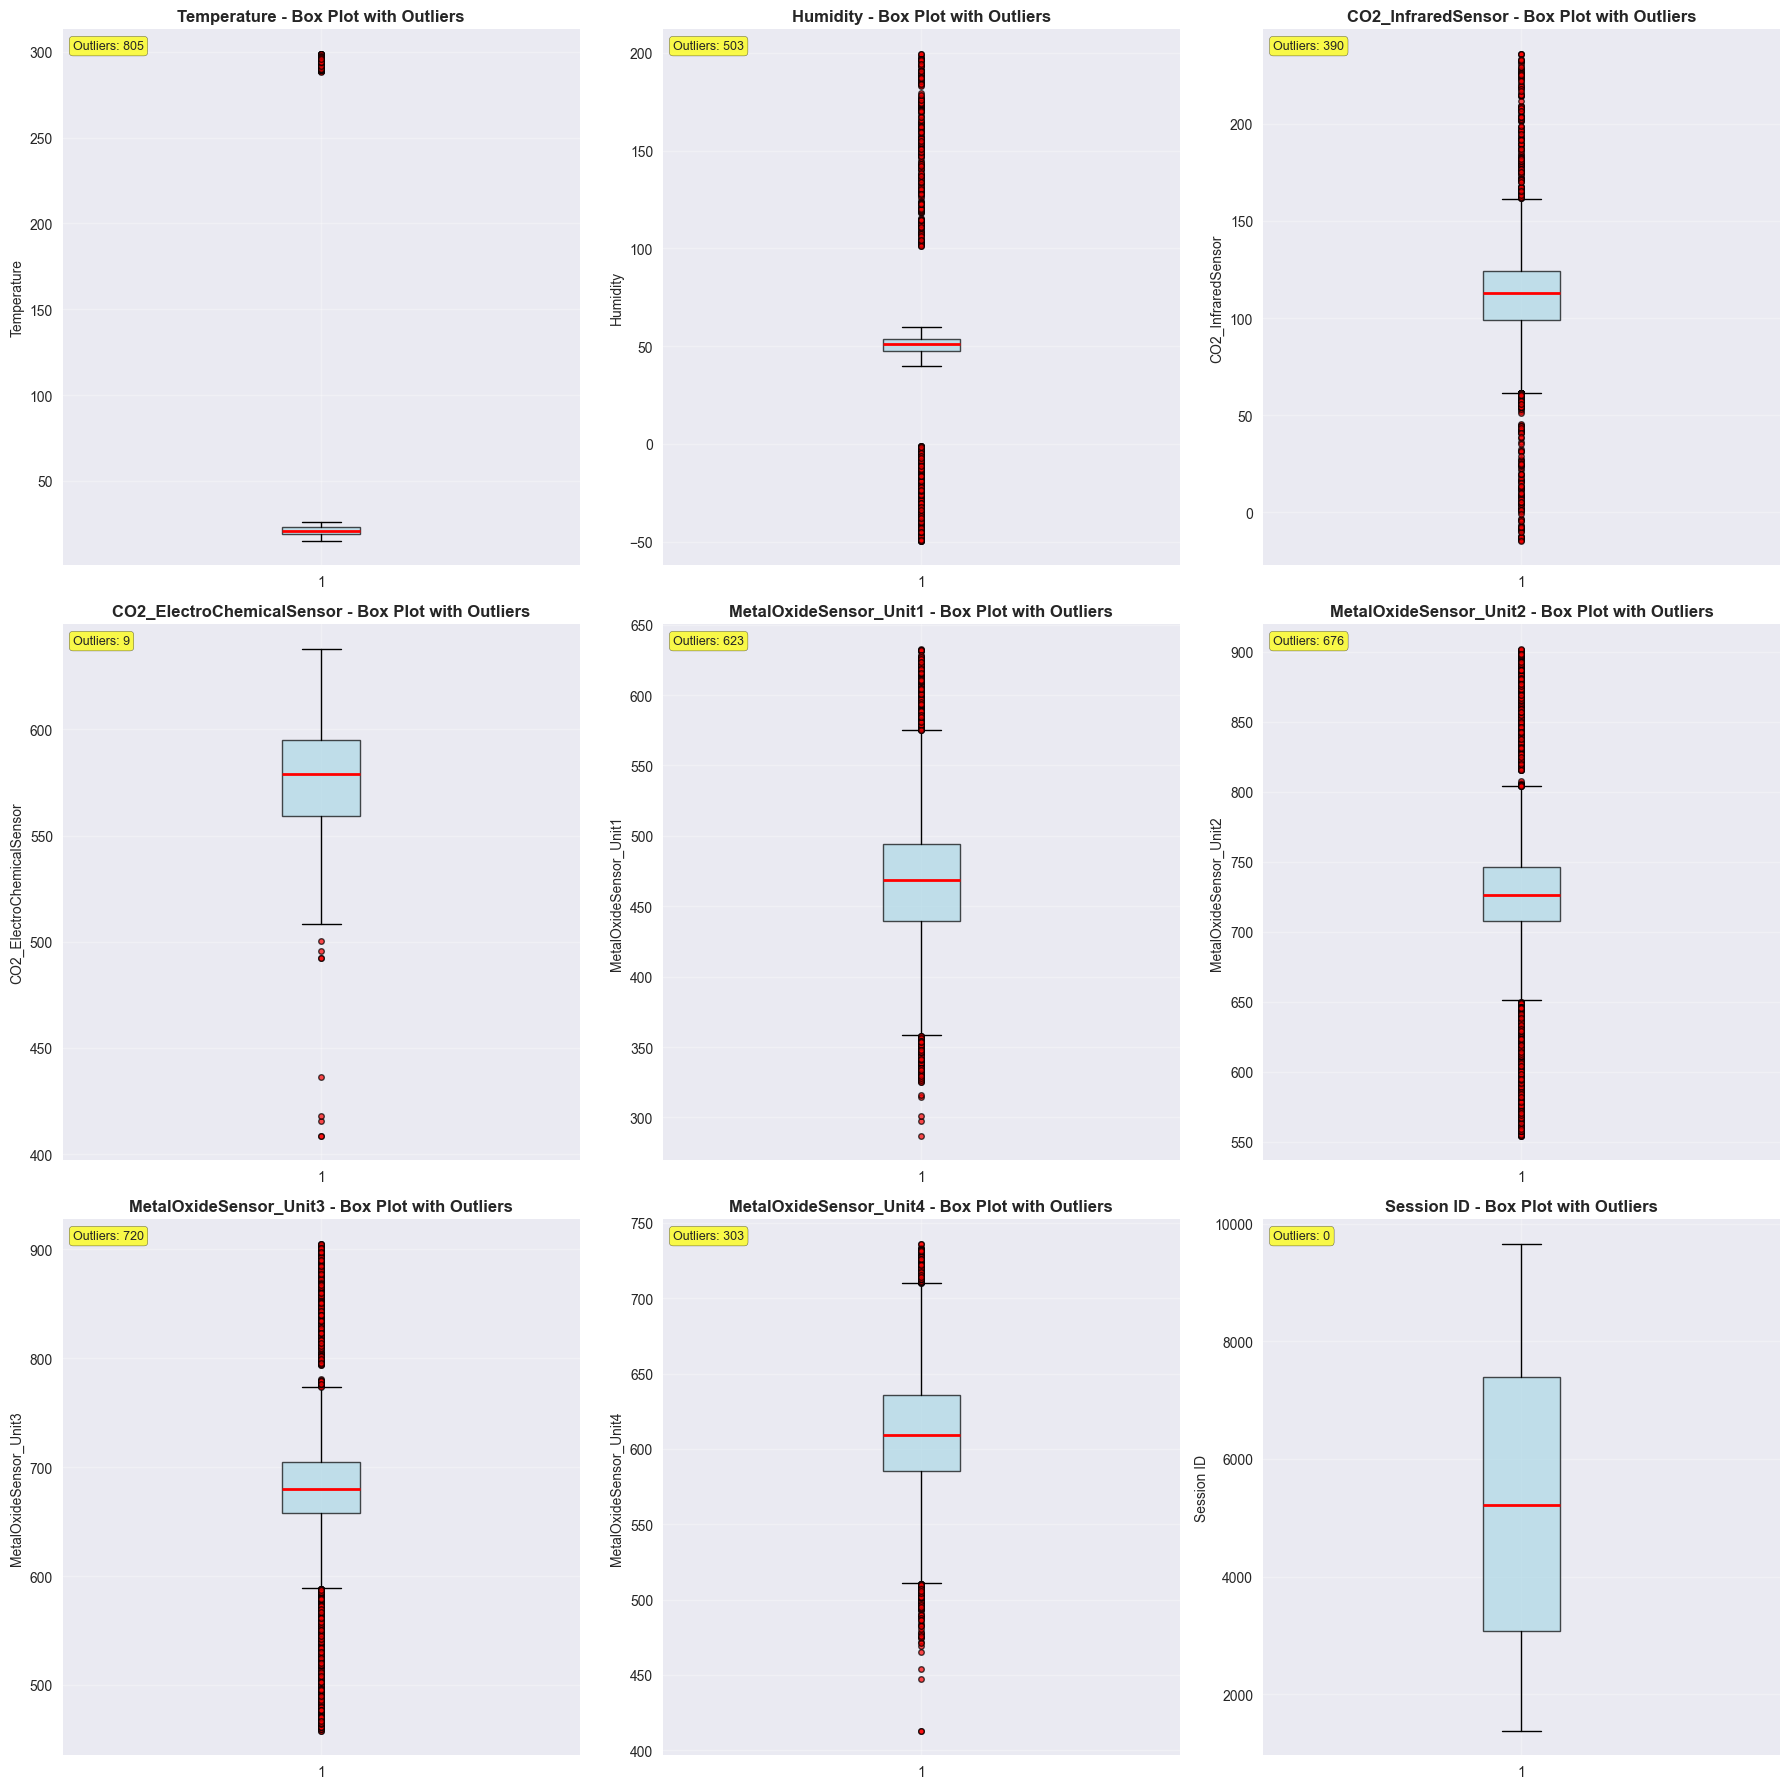

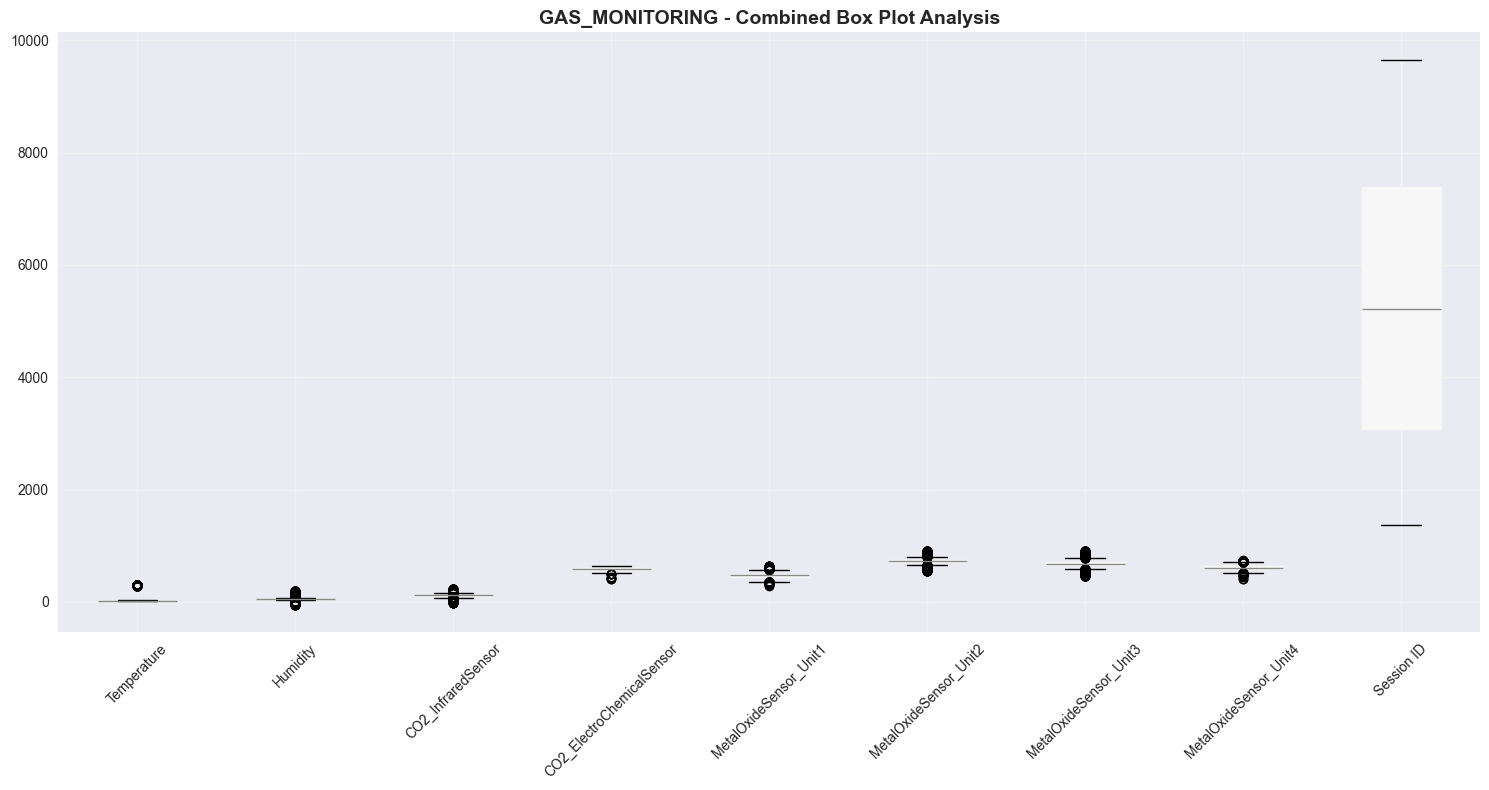


Box plot analysis completed!


In [8]:
# Create comprehensive box plots for outlier visualization
print("BOX PLOTS FOR OUTLIER VISUALIZATION")
print("=" * 50)

for name, df in dataframes.items():
    print(f"\nBox plots for {name.upper()}")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # Create subplots for box plots
        n_cols = min(3, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                # Create box plot
                box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True, 
                                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                                         medianprops=dict(color='red', linewidth=2),
                                         whiskerprops=dict(color='black'),
                                         capprops=dict(color='black'),
                                         flierprops=dict(marker='o', markerfacecolor='red', 
                                                       markersize=4, alpha=0.7))
                
                axes[i].set_title(f'{col} - Box Plot with Outliers', fontsize=12, fontweight='bold')
                axes[i].set_ylabel(col, fontsize=10)
                axes[i].grid(True, alpha=0.3)
                
                # Add outlier count annotation
                outliers_iqr, _, _ = detect_outliers_iqr(df, col)
                outlier_count = len(outliers_iqr)
                axes[i].text(0.02, 0.98, f'Outliers: {outlier_count}', 
                           transform=axes[i].transAxes, fontsize=9, 
                           verticalalignment='top', bbox=dict(boxstyle='round', 
                           facecolor='yellow', alpha=0.7))
        
        # Hide unused subplots
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Create a combined box plot for all numerical columns
        plt.figure(figsize=(15, 8))
        df[numeric_cols].boxplot(ax=plt.gca(), patch_artist=True)
        plt.title(f'{name.upper()} - Combined Box Plot Analysis', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\nBox plot analysis completed!")


## Comprehensive Data Analysis Conclusions

Based on the comprehensive exploratory data analysis of the gas monitoring dataset, here are the key findings and insights:


### Data Quality Assessment Summary

**Dataset Overview:**
- **Size**: 10,000 rows × 14 columns
- **Memory Usage**: 3.34 MB
- **Data Types**: 9 numerical, 5 categorical columns

**Critical Data Quality Issues:**
1. **Missing Data (4 columns affected):**
   - `CO2_ElectroChemicalSensor`: 706 missing (7.1%) - Moderate impact
   - `MetalOxideSensor_Unit3`: 2,566 missing (25.7%) - **High impact**
   - `CO_GasSensor`: 1,369 missing (13.7%) - Moderate impact  
   - `Ambient Light Level`: 2,532 missing (25.3%) - **High impact**

2. **Data Duplication:**
   - 120 duplicate rows (1.2%) - Low impact but needs investigation

3. **Data Distribution Issues:**
   - **Temperature**: Highly skewed (skewness: 3.08) with extreme outliers (max: 298.93°C)
   - **Humidity**: Right-skewed (skewness: 1.64) with negative values (min: -49.66%)
   - **CO2_InfraredSensor**: Near-normal distribution (skewness: -0.26)
   - **Metal Oxide Sensors**: Generally well-distributed with slight skewness

### Sensor Performance Analysis

**CO2 Sensors Comparison:**
- **Infrared Sensor**: More stable, normal distribution, fewer missing values
- **Electrochemical Sensor**: Higher values (mean: 578.33 vs 110.36), 7.1% missing data
- **Correlation**: Need to investigate relationship between both sensors

**Metal Oxide Sensor Units:**
- **Unit 1**: Most stable (std: 51.35), good data coverage
- **Unit 2**: Highest values (mean: 728.27), moderate variability
- **Unit 3**: **Major data quality issue** (25.7% missing), highest variability (std: 59.99)
- **Unit 4**: Balanced performance, good data coverage

### Environmental Context Analysis

**Time Patterns:**
- **Afternoon**: Most active period (2,605 records)
- **Evening**: Second most active (2,485 records)
- **Night**: Least active (2,456 records)
- **Morning**: Not specified in top categories

**Activity Levels:**
- **Low Activity**: Dominant (52.3% of records)
- **Moderate Activity**: Significant (28.1% of records)
- **High Activity**: Minority (10.9% of records)

**HVAC Operations:**
- **Cooling Active**: Most common mode (1,504 records)
- **Maintenance Mode**: Frequent (1,501 records)
- **Heating Active**: Common (1,491 records)
- **23 different modes** - High operational complexity

### Critical Findings for Machine Learning

**High-Priority Issues:**
1. **Missing Data Strategy**: 25.7% missing in MetalOxideSensor_Unit3 requires robust imputation
2. **Outlier Treatment**: Temperature and Humidity show extreme outliers that may indicate sensor malfunctions
3. **Feature Engineering**: Time-based features and sensor interaction terms needed
4. **Data Validation**: Negative humidity values suggest sensor calibration issues

**Model Preparation Recommendations:**
1. **Imputation Strategy**: Use sensor correlations for missing value estimation
2. **Outlier Handling**: Cap extreme values or use robust scaling
3. **Feature Engineering**: Create time-based, sensor interaction, and environmental features
4. **Target Variable**: Consider Activity Level or HVAC Operation Mode as prediction targets


In [9]:
# Key Insights and Findings
print("KEY INSIGHTS AND FINDINGS")
print("=" * 50)

for name, df in dataframes.items():
    print(f"\n{name.upper()}")
    print("-" * 30)
    
    # Data overview
    print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns")
    
    # Missing data insights
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"Missing data found in {missing_data[missing_data > 0].count()} columns")
        for col, missing_count in missing_data[missing_data > 0].items():
            percentage = (missing_count / len(df)) * 100
            print(f"   - {col}: {missing_count:,} missing ({percentage:.1f}%)")
    else:
        print("No missing data")
    
    # Data quality insights
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"{duplicates:,} duplicate rows found")
    else:
        print("No duplicate rows")
    
    # Numerical insights
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nNumerical Analysis ({len(numeric_cols)} columns):")
        for col in numeric_cols:
            col_data = df[col].dropna()
            if len(col_data) > 0:
                print(f"   - {col}:")
                print(f"     Range: {col_data.min():.2f} to {col_data.max():.2f}")
                print(f"     Mean: {col_data.mean():.2f}, Std: {col_data.std():.2f}")
                print(f"     Skewness: {col_data.skew():.2f}")
    
    # Categorical insights
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\nCategorical Analysis ({len(categorical_cols)} columns):")
        for col in categorical_cols:
            unique_count = df[col].nunique()
            print(f"   - {col}: {unique_count} unique values")
            if unique_count <= 10:
                top_values = df[col].value_counts().head(3)
                print(f"     Top values: {top_values.to_dict()}")

print("\ RECOMMENDATIONS")
print("=" * 50)
print("1. Review missing data patterns and consider imputation strategies")
print("2. Investigate duplicate rows and determine if they should be removed")
print("3. Analyze numerical distributions for outliers and data quality issues")
print("4. Examine categorical variables for data consistency")
print("5. Consider feature engineering based on domain knowledge")
print("6. Plan further analysis based on business objectives")

# Close database connection
conn.close()
print("\nDatabase connection closed")


KEY INSIGHTS AND FINDINGS

GAS_MONITORING
------------------------------
Dataset contains 10,000 rows and 14 columns
Missing data found in 4 columns
   - CO2_ElectroChemicalSensor: 706 missing (7.1%)
   - MetalOxideSensor_Unit3: 2,566 missing (25.7%)
   - CO_GasSensor: 1,369 missing (13.7%)
   - Ambient Light Level: 2,532 missing (25.3%)
120 duplicate rows found

Numerical Analysis (9 columns):
   - Temperature:
     Range: 14.94 to 298.93
     Mean: 42.56, Std: 74.35
     Skewness: 3.08
   - Humidity:
     Range: -49.66 to 199.59
     Mean: 51.13, Std: 20.57
     Skewness: 1.64
   - CO2_InfraredSensor:
     Range: -14.67 to 236.01
     Mean: 110.36, Std: 25.06
     Skewness: -0.26
   - CO2_ElectroChemicalSensor:
     Range: 408.60 to 637.90
     Mean: 578.33, Std: 22.67
     Skewness: -0.04
   - MetalOxideSensor_Unit1:
     Range: 286.83 to 632.89
     Mean: 470.36, Std: 51.35
     Skewness: 0.42
   - MetalOxideSensor_Unit2:
     Range: 554.28 to 902.21
     Mean: 728.27, Std: 43.30
 

<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
C:\Users\irfaa\AppData\Local\Temp\ipykernel_30124\3716963959.py:52: SyntaxWarning: invalid escape sequence '\ '
  print("\ RECOMMENDATIONS")
